In [99]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [100]:
dataset = pd.read_csv('/Users/shirley/Desktop/voice_Kaggle.csv')

In [101]:
x= dataset.iloc[:,0:-1]
y= dataset.iloc[:,-1]

# splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [102]:
#svm with default parameter without scaling
from sklearn.svm import SVC
from sklearn import metrics
sc=SVC()
sc.fit(x_train, y_train)
prediction = sc.predict(x_test)
print('Accuracy for default parameter without scaling')
print(metrics.accuracy_score(y_test,prediction))

Accuracy for default parameter without scaling
0.742902208202


In [103]:
#svm with linear kernel without scaling
from sklearn.svm import SVC
from sklearn import metrics
sc=SVC(kernel = 'linear')
sc.fit(x_train, y_train)
prediction = sc.predict(x_test)
print('Accuracy for svm with Linear kernel without scaling')
print(metrics.accuracy_score(y_test,prediction))


Accuracy for svm with Linear kernel without scaling
0.92429022082


In [104]:
#svm with rbf kernel without scaling
from sklearn.svm import SVC
from sklearn import metrics
sc=SVC(kernel = 'rbf')
sc.fit(x_train, y_train)
prediction = sc.predict(x_test)
print('Accuracy for svm with RBF kernel without scaling')
print(metrics.accuracy_score(y_test,prediction))

Accuracy for svm with RBF kernel without scaling
0.742902208202


In [105]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [106]:
# fitting svm to the training set
from sklearn.svm import SVC
print('Linear Kernel after scaling')
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_train)
print('Accuracy in training samples for SVM: ',  accuracy_score(y_train,prediction))
prediction2 = classifier.predict(x_test)
print('Accuracy in testing samples for SVM: ', accuracy_score(y_test, prediction2))

Linear Kernel after scaling
Accuracy in training samples for SVM:  0.975532754538
Accuracy in testing samples for SVM:  0.973186119874


When the C value is: 1 then the accurancy is: 0.973946
When the C value is: 2 then the accurancy is: 0.973155
When the C value is: 3 then the accurancy is: 0.973155
When the C value is: 4 then the accurancy is: 0.972760
When the C value is: 5 then the accurancy is: 0.972760
When the C value is: 6 then the accurancy is: 0.972760
When the C value is: 7 then the accurancy is: 0.972760
When the C value is: 8 then the accurancy is: 0.972760
When the C value is: 9 then the accurancy is: 0.972760
When the C value is: 10 then the accurancy is: 0.972760
When the C value is: 11 then the accurancy is: 0.973155
When the C value is: 12 then the accurancy is: 0.973155
When the C value is: 13 then the accurancy is: 0.973155
When the C value is: 14 then the accurancy is: 0.973155
When the C value is: 15 then the accurancy is: 0.973155


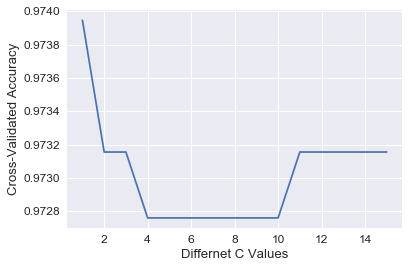

In [109]:
# Linear kernel with different C values
from sklearn.model_selection import train_test_split, cross_val_score
def linear_c(x_train, y_train, c):
    accurancy = []
    for i in c:
        sc = SVC(kernel='linear', C=i)
        scores = cross_val_score(sc, x_train, y_train, cv=10, scoring='accuracy')
        accurancy.append(scores.mean())
        print("When the C value is: %d then the accurancy is: %f" % (i, scores.mean()))

    plt.plot(c, accurancy)
    plt.xlabel('Differnet C Values')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

c_values = list(np.arange(1, 16))
linear_c(x_train, y_train, c_values)